In [1]:
# Required libraries:-
# !pip install numpy pandas matplotlib scikit-learn yfinance


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("C:\\Users\\vikas\\Downloads\\archive\\AAPL.csv")

In [4]:
df.dropna(inplace=True)

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...,...
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700


In [6]:
df.to_csv('Apple.csv')

Mean Squared Error: 0.9203499981685641


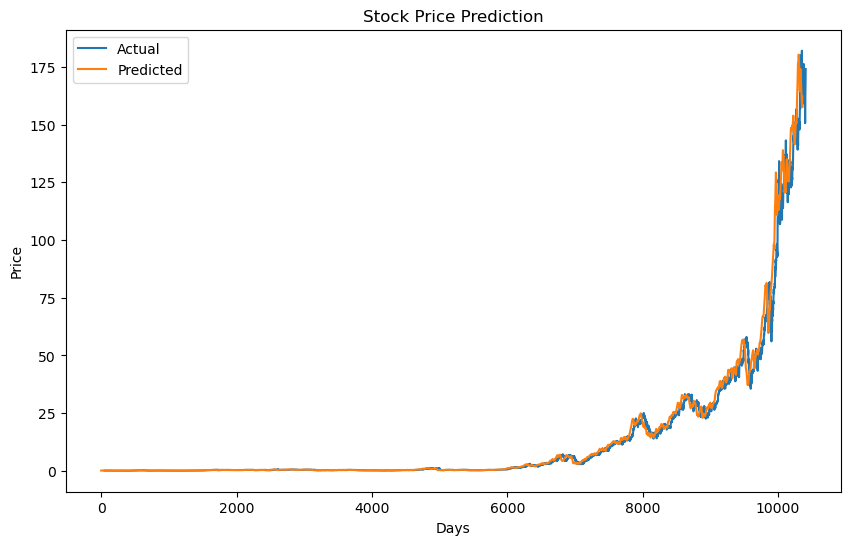

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def load_data(file_path):
    return pd.read_csv(file_path)

def preprocess_data(data):
    # Convert date column to datetime type
    data['Date'] = pd.to_datetime(data['Date'])

    # Calculate moving averages (MA) for 10 and 50 days
    data['MA_10'] = data['Close'].rolling(window=10).mean()
    data['MA_50'] = data['Close'].rolling(window=50).mean()

    # Drop rows with missing values (due to MA calculation)
    data.dropna(inplace=True)

    return data

def train_model(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model, X_test, y_test

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    return mse

def plot_predictions(actual, predicted):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Actual')
    plt.plot(predicted, label='Predicted')
    plt.title('Stock Price Prediction')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def main():
    # Load data
    file_path = 'C:/Users/vikas/AAPL.csv'  # Replace with your file path
    stock_data = load_data(file_path)

    # Preprocess data
    stock_data = preprocess_data(stock_data)

    # Features and target
    features = stock_data[['MA_10', 'MA_50']]
    target = stock_data['Close']

    # Train the model
    model, X_test, y_test = train_model(features, target)

    # Evaluate the model
    mse = evaluate_model(model, X_test, y_test)

    # Make predictions
    y_pred = model.predict(features)

    # Plot predictions
    plot_predictions(target, y_pred)

if __name__ == "__main__":
    main()
